In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('general_data.csv')

df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [4]:
le = LabelEncoder()

In [5]:
df['Attrition'] = le.fit_transform(df['Attrition'])
df['Attrition'].unique()

array([0, 1])

In [6]:
df['BusinessTravel'].value_counts()

Travel_Rarely        3129
Travel_Frequently     831
Non-Travel            450
Name: BusinessTravel, dtype: int64

In [7]:
df['BusinessTravel'] = le.fit_transform(df['BusinessTravel'])
df['BusinessTravel'].unique()

array([2, 1, 0])

In [8]:
df['Department'].value_counts()

Research & Development    2883
Sales                     1338
Human Resources            189
Name: Department, dtype: int64

In [9]:
df['Department'] = le.fit_transform(df['Department'])
df['Department'].unique()

array([2, 1, 0])

In [10]:
df['EducationField'].value_counts()

Life Sciences       1818
Medical             1392
Marketing            477
Technical Degree     396
Other                246
Human Resources       81
Name: EducationField, dtype: int64

In [11]:
df['EducationField'] = le.fit_transform(df['EducationField'])
df['EducationField'].unique()

array([1, 4, 3, 2, 5, 0])

In [12]:
df['Gender'] = le.fit_transform(df['Gender'])
df['Gender'].unique()

array([0, 1])

In [13]:
df['JobRole'].value_counts()

Sales Executive              978
Research Scientist           876
Laboratory Technician        777
Manufacturing Director       435
Healthcare Representative    393
Manager                      306
Sales Representative         249
Research Director            240
Human Resources              156
Name: JobRole, dtype: int64

In [14]:
df['JobRole'] = le.fit_transform(df['JobRole'])
df['JobRole'].unique()

array([0, 6, 7, 1, 5, 2, 4, 8, 3])

In [15]:
df['MaritalStatus'].value_counts()

Married     2019
Single      1410
Divorced     981
Name: MaritalStatus, dtype: int64

In [16]:
df['MaritalStatus'] = le.fit_transform(df['MaritalStatus'])
df['MaritalStatus'].unique()

array([1, 2, 0])

In [17]:
df.drop(['Over18'], axis=1, inplace=True)

In [18]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [19]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [20]:
df['NumCompaniesWorked'].mean()

2.6948303347756775

In [21]:
df['NumCompaniesWorked'].fillna(2, inplace=True)

In [22]:
df['NumCompaniesWorked'].isna().sum()

0

In [23]:
df['TotalWorkingYears'].mean()

11.279936378095888

In [24]:
df['TotalWorkingYears'].fillna(11, inplace=True)

In [25]:
df['TotalWorkingYears'].isna().sum()

0

In [26]:
df.isna().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

No more missing values exist.

In [27]:
# Split data into X and y.

X = df.drop(['Attrition'], axis=1)
X.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,...,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,2,2,6,2,1,1,1,0,1,...,131160,1.0,11,8,0,1.0,6,1,0,0
1,31,1,1,10,1,1,1,2,0,1,...,41890,0.0,23,8,1,6.0,3,5,1,4
2,32,1,1,17,4,4,1,3,1,4,...,193280,1.0,15,8,3,5.0,2,5,0,3
3,38,0,1,2,5,1,1,4,1,3,...,83210,3.0,11,8,3,13.0,5,8,7,5
4,32,2,1,10,1,3,1,5,1,1,...,23420,4.0,12,8,2,9.0,2,6,0,4


In [28]:
y = df.iloc[:,1:2]
y.head()

,Attrition
0,0
1,1
2,0
3,0
4,0


In [29]:
# Split data into train and test.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [30]:
X_train.shape

(3087, 22)

In [31]:
X_test.shape

(1323, 22)

In [32]:
y_train.shape

(3087, 1)

In [33]:
y_test.shape

(1323, 1)

__Using RandomForrestClassifier to select the best feature variables__

In [34]:
rf_model = RandomForestClassifier(n_estimators=1000, max_features=2, oob_score=True)

In [35]:
rf_model.fit(X=X_train, y=y_train)

C:\Users\comp\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [36]:
print('The oob Accuracy Score is :', rf_model.oob_score_)

The oob Accuracy Score is : 0.9734369938451571


In [37]:
for feature, imp in zip(X_train, rf_model.feature_importances_):
    print(feature, imp)

Age 0.09150779884960417
BusinessTravel 0.026484449180636627
Department 0.024421912330930433
DistanceFromHome 0.06416513782588294
Education 0.037444779100925724
EducationField 0.03920681234958687
EmployeeCount 0.0
EmployeeID 0.04893479896643988
Gender 0.017447722638836115
JobLevel 0.03545277260037309
JobRole 0.05170922262350779
MaritalStatus 0.04086207444107956
MonthlyIncome 0.08845798041459851
NumCompaniesWorked 0.05405388033981765
PercentSalaryHike 0.060962466619492485
StandardHours 0.0
StockOptionLevel 0.03170013629627334
TotalWorkingYears 0.08229828200251496
TrainingTimesLastYear 0.04273902790890716
YearsAtCompany 0.06775872229038941
YearsSinceLastPromotion 0.03993217786851685
YearsWithCurrManager 0.054459845351686395


The following are considered the most important feature : 'Age', 'DistanceFromHome', 'JobRole', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany', 'YearsWithCurrManager'

__Using DecisionTreeClassifer to build the model__

In [38]:
# Using the most important features to build a Decision Tree with train dataset

imp_features = pd.DataFrame([X_train['Age'], X_train['DistanceFromHome'], X_train['JobRole'], X_train['MonthlyIncome'], X_train['NumCompaniesWorked'], X_train['PercentSalaryHike'], X_train['TotalWorkingYears'], X_train['YearsAtCompany'], X_train['YearsWithCurrManager']]).T

In [39]:
tree_model = DecisionTreeClassifier(max_depth=18)

In [40]:
tree_model.fit(X=imp_features, y=y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=18, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [41]:
from sklearn import tree

In [42]:
with open('Dt_genData.dot', 'w') as f:
    f=tree.export_graphviz(tree_model, feature_names=['Age', 'DistanceFromHome', 'JobRole', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany', 'YearsWithCurrManager'], out_file=f);

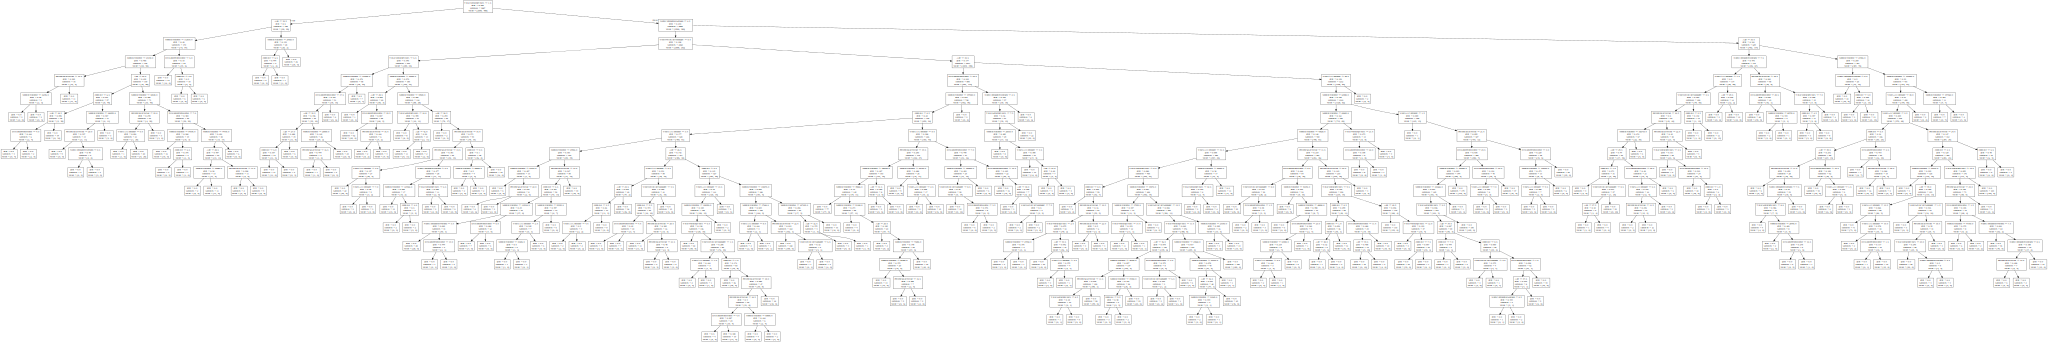

In [49]:
import graphviz

with open('Dt_genData.dot') as f:
    tr_graph=f.read()

graphviz.Source(tr_graph)

In [43]:
tree_model.score(X=imp_features, y=y_train)

0.9987042436022028

The model has an efficiency of 99.87%

__Using Decision Tree to predict Attrition__

In [44]:
test_features = pd.DataFrame([X_test['Age'], X_test['DistanceFromHome'], X_test['JobRole'], X_test['MonthlyIncome'], X_test['NumCompaniesWorked'], X_test['PercentSalaryHike'], X_test['TotalWorkingYears'], X_test['YearsAtCompany'], X_test['YearsWithCurrManager']]).T

In [45]:
test_pred = tree_model.predict(X=test_features)

In [46]:
Predicted_Output = pd.DataFrame({'Age':X_test['Age'], 'DistanceFromHome':X_test['DistanceFromHome'], 'JobRole':X_test['JobRole'], 'MonthlyIncome':X_test['MonthlyIncome'], 'NumCompaniesWorked':X_test['NumCompaniesWorked'], 'PercentSalaryHike':X_test['PercentSalaryHike'], 'TotalWorkingYears':X_test['TotalWorkingYears'], 'YearsAtCompany':X_test['YearsAtCompany'], 'YearsWithCurrManager':X_test['YearsWithCurrManager'], 'Attrition':test_pred})

In [47]:
Predicted_Output.to_csv('GeneralData_Output.csv', index=False)

Predicted output with test dataset has been generated in GeneralData_Output.csv

In [48]:
GeneralData_Output = pd.read_csv('GeneralData_Output.csv')

GeneralData_Output.head(10)

,Age,DistanceFromHome,JobRole,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsWithCurrManager,Attrition
0,48,2,7,23700,2.0,11,27.0,5,1,0
1,21,10,6,66870,1.0,19,2.0,2,2,0
2,50,2,7,29600,1.0,14,32.0,32,7,0
3,37,2,2,40010,6.0,11,17.0,1,0,1
4,40,2,2,167520,2.0,18,8.0,3,2,0
5,40,1,2,30680,3.0,19,20.0,1,1,0
6,46,23,2,34910,2.0,14,25.0,19,8,0
7,44,5,6,171590,5.0,22,16.0,2,2,0
8,31,1,7,27930,1.0,16,9.0,9,0,0
9,35,15,6,19040,1.0,22,10.0,10,7,1
